![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Using Pre-trained Models in Keras to get Rank-1 and Rank-5 Accuracy**
1. We'll first load the pre-trained ImageNet model MobileNetV2
2. We'll get the top 5 classes from a single image inference
3. Next we'll construct a function to give us the rank-N Accuracy using a few test images

---


In [ ]:
# Load our pre-trained MobileNetV2 Model

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
# Get the imageNet Class label names and test images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
!unzip imagesDLCV.zip
!rm -rf ./images/class1/.DS_Store

Downloading...
From: https://drive.google.com/uc?id=1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
To: /content/images.zip
100% 1.46M/1.46M [00:00<00:00, 92.3MB/s]
Archive:  images.zip
replace images/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/.DS_Store        
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_(10096362833).jpg  
  inflating: images/class1/christmas-stockings-3006869_1280.jpg  
  inflating: images/class1/download.jpg  
  inflating: images/class1/limo-safety-ftr.jpg  
  inflating: images/class1/long-haired-collie-5766447_1280.jpg  
  inflating: images/class1/spiderweb_1050x700.jpg  


In [ ]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder    
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['Basketball_(Ball).jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'limo-safety-ftr.jpg',
 'spiderweb_1050x700.jpg',
 '1539714414867.jpg',
 'download.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'long-haired-collie-5766447_1280.jpg']

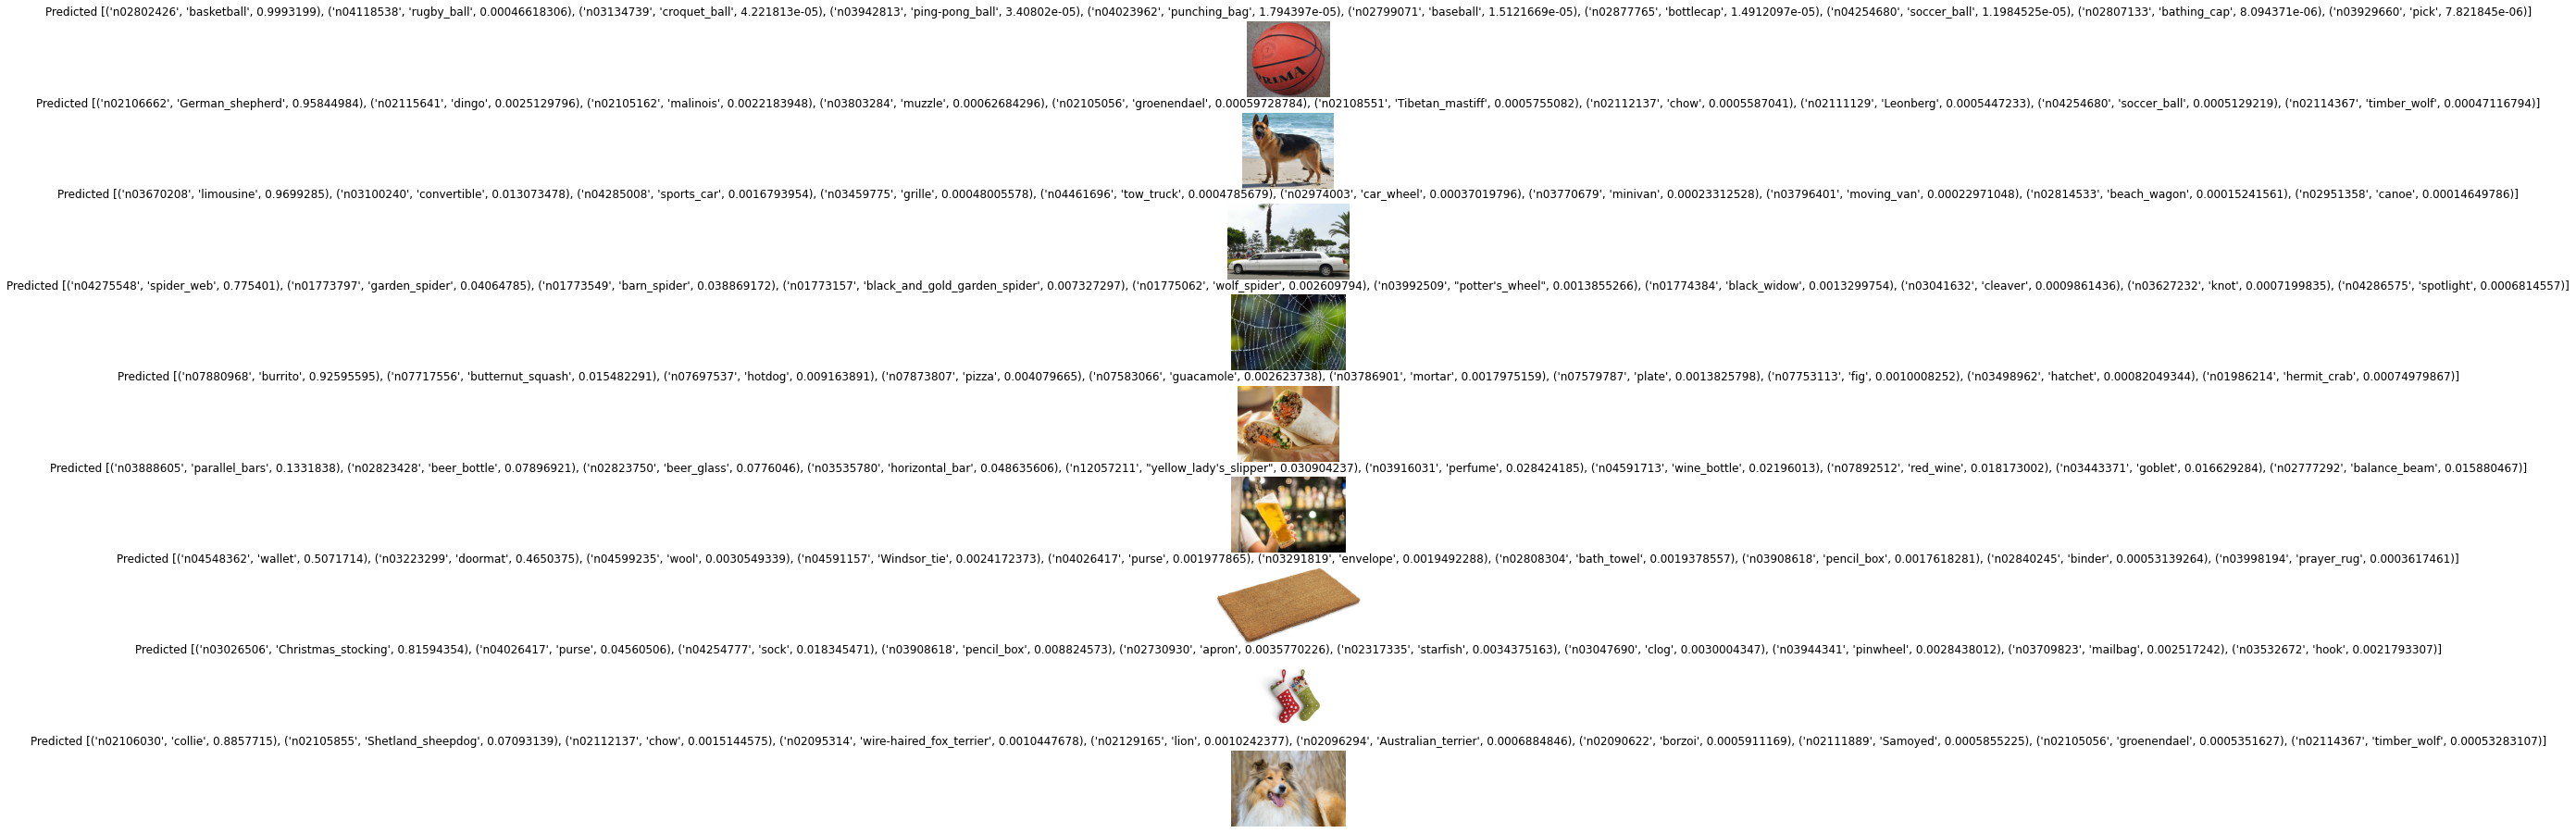

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))
all_top_classes = []

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=10)[0]
    all_top_classes.append([x[1] for x in preditions])
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions)}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
preditions

[('n02106030', 'collie', 0.8857715),
 ('n02105855', 'Shetland_sheepdog', 0.07093139),
 ('n02112137', 'chow', 0.0015144575),
 ('n02095314', 'wire-haired_fox_terrier', 0.0010447678),
 ('n02129165', 'lion', 0.0010242377)]

In [ ]:
all_top_classes

[['basketball',
  'rugby_ball',
  'croquet_ball',
  'ping-pong_ball',
  'punching_bag',
  'baseball',
  'bottlecap',
  'soccer_ball',
  'bathing_cap',
  'pick'],
 ['German_shepherd',
  'dingo',
  'malinois',
  'muzzle',
  'groenendael',
  'Tibetan_mastiff',
  'chow',
  'Leonberg',
  'soccer_ball',
  'timber_wolf'],
 ['limousine',
  'convertible',
  'sports_car',
  'grille',
  'tow_truck',
  'car_wheel',
  'minivan',
  'moving_van',
  'beach_wagon',
  'canoe'],
 ['spider_web',
  'garden_spider',
  'barn_spider',
  'black_and_gold_garden_spider',
  'wolf_spider',
  "potter's_wheel",
  'black_widow',
  'cleaver',
  'knot',
  'spotlight'],
 ['burrito',
  'butternut_squash',
  'hotdog',
  'pizza',
  'guacamole',
  'mortar',
  'plate',
  'fig',
  'hatchet',
  'hermit_crab'],
 ['parallel_bars',
  'beer_bottle',
  'beer_glass',
  'horizontal_bar',
  "yellow_lady's_slipper",
  'perfume',
  'wine_bottle',
  'red_wine',
  'goblet',
  'balance_beam'],
 ['wallet',
  'doormat',
  'wool',
  'Windsor_

In [ ]:
# Create our ground truth labels
ground_truth = ['basketball',
                'German shepherd',
                'limousine, limo',
                'spider_web',
                'burrito',
                'beer_glass',
                'doormat',
                'Christmas_stocking',
                'collie']

In [ ]:
def getScore(all_top_classes, ground_truth, N):
  # Calcuate rank-N score
  in_labels = 0
  for (i,labels) in enumerate(all_top_classes):
    if ground_truth[i] in labels[:N]:
      in_labels += 1
  return f'Rank-{N} Accuracy = {in_labels/len(all_top_classes)*100:.2f}%'

## **Get Rank-5 Accuracy**

In [ ]:
getScore(all_top_classes, ground_truth, 5)

'Rank-5 Accuracy = 77.78%'

## **Get Rank-1 Accuracy**

In [ ]:
getScore(all_top_classes, ground_truth, 1)

'Rank-1 Accuracy = 55.56%'

In [ ]:
getScore(all_top_classes, ground_truth, 10)

'Rank-10 Accuracy = 77.78%'